In [50]:
import numpy as np
import torch

In [40]:
n=int(5e4)
d=100
k=1

In [41]:
func=[lambda x, i=i: torch.sin((i+1)*x) for i in range(d)]
x=torch.rand((int(1e4),)) * 10
def apply_on_tensor(functions, tensor):
    out = []
    for i in range(tensor.shape[0]):
        out.append(torch.tensor([f(tensor[i]) for f in functions]))
    return torch.stack(out)

In [42]:
data = apply_on_tensor(func, x)

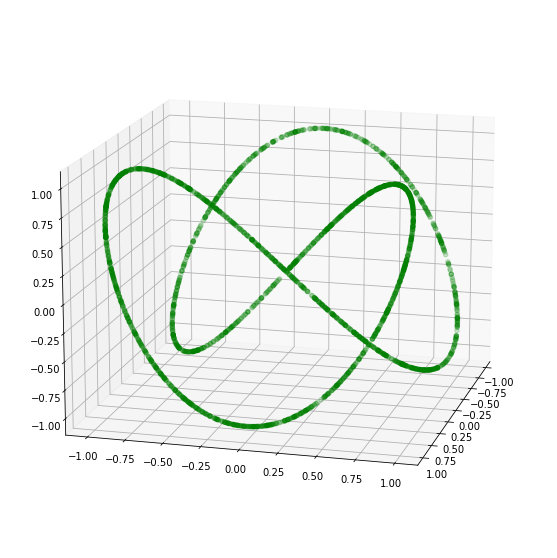

In [52]:
from matplotlib import pyplot as plt
plotting_n = 3000
ids = np.random.randint(0, data.shape[0], plotting_n)
plt_data = data.numpy()[ids]
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection='3d'))
ax.scatter(plt_data[:,0], plt_data[:,1], plt_data[:,2], alpha=.2, color='g')
ax.view_init(15, 15)

#fig, ax = plt.subplots(figsize=(10,10))
#ax.scatter(plt_data[:,0], plt_data[:,1], alpha=.2)

fig.savefig('figures/spaghetti', dpi=300, facecolor='white')
fig.show()

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
pca.fit(data.numpy())
pca.n_components_

98

In [28]:
print(np.linalg.norm(plt_data, axis=1).mean().item())
print(np.linalg.norm(plt_data, axis=1).min().item())
print(np.linalg.norm(plt_data, axis=1).max().item())

1.0
0.9999998211860657
1.0000001192092896


In [41]:
data

tensor([[-0.9523, -0.3051,  0.0000],
        [-0.0862,  0.9963,  0.0000],
        [ 0.7963,  0.6048,  0.0000],
        ...,
        [ 0.0000, -0.1646, -0.9864],
        [ 0.0000,  0.6309, -0.7759],
        [ 0.0000, -0.4252, -0.9051]])

In [43]:
import pickle
with open('logs/ksphere/dim_10/n_2/non_uniform_1/config.pkl', 'rb') as f:
    config = pickle.load(f)

In [46]:
config.data.angle_std

1